# Written by FBB for DSPS 2019
# HW 7

# **PART** I Due Tuesday 10/22 at midnight

Read in the abstract, first paragaph of the main text and page three of [Nam et al. 2018](https://arxiv.org/pdf/1811.10212.pdf) which should be sufficient to give you an idea of the problem context., 

# 1 Get the data 
from the Harvard Dataverse open data repository (well curated and organized open data repositories are a blessing in science and data science - they enable reproducibility! - This one is a great one.)

Use ```wget``` and the link in the paper (page 17). YOu want the data for Fig 1 insert G.


In [3]:
from google.colab import drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy as sp
from scipy import stats
import statsmodels.api as sm
from statsmodels import graphics
from statsmodels.formula import api as smf

In [0]:
#!wget https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/9QKJU2/WOMIZQ

In [0]:
#mv :persistentId?persistentId=doi:10.7910%2FDVN%2F9QKJU2%2FWOMIZQ "drive/My Drive/dsps"

In [0]:
#cd "drive/My Drive/dsps"

In [0]:
#ls

In [0]:
#mv ':persistentId?persistentId=doi:10.7910%2FDVN%2F9QKJU2%2FWOMIZQ' fig1datag.txt

In [0]:
#ls


In [0]:
nam18 = pd.read_csv("drive/My Drive/dsps/fig1datag.txt",sep = '\t', header = None)


In [11]:

nam18.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.247,0.000000,0.114,--,1.998,-0.6682,0.236,--,NaN,0.0,0.000000
1,0.270,0.264431,0.291,--,3.008,0.0000,1.640,0,NaN,1.0,0.000163
2,0.290,0.247896,0.290,--,4.013,1.1170,2.500,0.2,NaN,1.5,0.007934
3,0.330,0.232262,0.330,--,5.006,2.4760,3.999,1.538,NaN,2.0,0.058189
4,0.379,0.233420,0.380,--,6.015,4.4130,5.000,2.866,NaN,2.5,0.198115


# Data Wrangling and visualization



Write *a single line of code* that does the following (in whichever order you want):

- removes all columns you do not need. 
- removes Nan values that appear in the relevant columns.
- renames the columns according to the notation on in the paper figure (Fig 1 insert G)

Writing this in a single line of code is the "pythonic" way to do it - meaning its in the conding style of the language. You can do it by concatenating methods that do wach step, like ```df.method1(...).method2(...).method3(...)```
and as long as each method returns a dataframe another method can be appended. The code will be run left to right with the next method running on the dataframe returned by the previous one.

Note that you can use latex notation for the lables, e.g.:
```str=r"\Delta^2"```
would look like what you wrote when you look at the column names, but would look like 

$\Delta^2$ 

in the plot label if plotting with df.plot()



In [12]:
nam18reduced = ((nam18[[0, 1]]).rename(columns={0: 'Temperature', 1 : 'n'})).dropna()
nam18reduced.head()

,Temperature,n
0,0.247,0.000000
1,0.270,0.264431
2,0.290,0.247896
3,0.330,0.232262
4,0.379,0.233420


Text(0.5, 1.0, 'Conduction Band Electron Density')

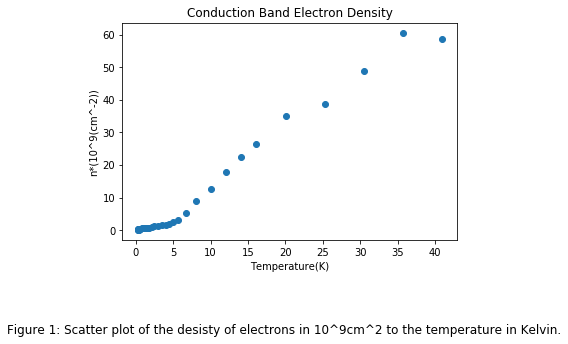

In [40]:
pl.scatter(nam18reduced['Temperature'], nam18reduced['n'])
pl.xlabel('Temperature(K)')
pl.ylabel('n*(10^9(cm^-2))')

figureLabel = "Figure 1: Scatter plot of the desisty of electrons in 10^9cm^2 to the temperature in Kelvin."
pl.figtext(0.5, -0.2, figureLabel, ha = 'center', fontsize = 12, wrap = True)
pl.title('Conduction Band Electron Density')

# 677 and Extra Credit

Create a function that generates a polynomial of any degree.

Functions can take variable number of arguments if passed as a tuple with a * (this is a pointer. If you coded in C you know this syntax.)

What I mean by that is that I can create a function as:


In [0]:
def polynom(x, *n):
  '''
  paramters:
  x-> x data values
  *n-> pointer for the degree of freedom
 
  return:
  some_polynom-> desired polynomial with ndegrees of freedom fit to the data
  '''
  some_polynom = sum([p*(x**i) for i, p in enumerate(n)])
  return(some_polynom)

So based on this create a function that takes the _x_ vector (exogenous variable) and a pointer to n coefficients. Those will be the parameters of the polynomial and it will be a list of 2 elements for a line (slope and intercept), of 3 elements for a second degree polynomial, 4 for a third etc etc. Fit this with scipy.optimize.curve_fit fitting a polynomial of 1st (line), 2nd (parabola), and 3rd degree.

# 3 Model

Use the statsmodels.formula.api package to run Ordinary Linear Fits (ols) and fit a line, a second degree polynomial and a third degree polynomial to the data. For each model extract the log-likelihood and print it out explicitally for each mode. How do the lof-likelihoods compare for the three models? does it make sense? explain. Just by reading the log-likelihood value can you say which model is better? Discuss

Note: if you followed the instructions and renamed variables as I asked you to above, you will encounter an issue here, Although pandas know how to render the string in the plot, statsmodels has issues with parsing a complex string with characters such as "(" or latex inputs.

In [17]:
t = 'Temperature'
n = 'n'
nam18reduced['logT'] = np.log10(nam18reduced[[t]])
nam18reduced.head()

,Temperature,n,logT
0,0.247,0.000000,-0.607303
1,0.270,0.264431,-0.568636
2,0.290,0.247896,-0.537602
3,0.330,0.232262,-0.481486
4,0.379,0.233420,-0.421361


In [18]:
model1 = smf.ols('n ~ Temperature', data = nam18reduced).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      n   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1813.
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           2.03e-30
Time:                        02:30:45   Log-Likelihood:                -78.878
No. Observations:                  35   AIC:                             161.8
Df Residuals:                      33   BIC:                             164.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.8884      0.492     -3.841      0.001      -2.889      -0.888
Temperature     1.6176      0.038     42.577      0.000       1.540       1.695
==============================================================================
Omnibus:                        1.418   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.041
Skew:                          -0.420   Prob(JB):                        0.594
Kurtosis:                       2.905   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model1.params

Intercept     -1.888445
Temperature    1.617586
dtype: float64

In [20]:
model1.llf

-78.87784843905396

In [21]:
nam18reduced['square'] = nam18reduced.Temperature**2
model2 = smf.ols('n ~ Temperature + square', data = nam18reduced).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      n   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     879.5
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.08e-28
Time:                        02:30:45   Log-Likelihood:                -78.866
No. Observations:                  35   AIC:                             163.7
Df Residuals:                      32   BIC:                             168.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.9344      0.592     -3.266      0.003      -3.141      -0.728
Temperature     1.6354      0.129     12.652      0.000       1.372       1.899
square         -0.0005      0.004     -0.144      0.886      -0.008       0.007
==============================================================================
Omnibus:                        1.219   Durbin-Watson:                   0.835
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                0.984
Skew:                          -0.399   Prob(JB):                        0.611
Kurtosis:                       2.809   Cond. No.                         608.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model2.params

Intercept     -1.934427
Temperature    1.635370
square        -0.000520
dtype: float64

In [23]:
nam18reduced['cube'] = nam18reduced.Temperature**3
model3 = smf.ols('n ~ Temperature + square + cube', data = nam18reduced).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      n   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1433.
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           2.54e-33
Time:                        02:30:45   Log-Likelihood:                -62.858
No. Observations:                  35   AIC:                             133.7
Df Residuals:                      31   BIC:                             139.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4186      0.441     -0.949      0.350      -1.318       0.481
Temperature     0.5900      0.175      3.380      0.002       0.234       0.946
square          0.0827      0.012      6.649      0.000       0.057       0.108
cube           -0.0015      0.000     -6.811      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        3.084   Durbin-Watson:                   1.326
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                1.813
Skew:                          -0.397   Prob(JB):                        0.404
Kurtosis:                       3.784   Cond. No.                     2.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
print("The linear model's log-likelihood:\t{:0.5f}".format(model1.llf))
print("The quadratic model's log-likelihood:\t{:0.5f}".format(model2.llf))
print("The cubic model's log-likelihood:\t{:0.5f}".format(model3.llf))

The linear model's log-likelihood:	-78.87785
The quadratic model's log-likelihood:	-78.86649
The cubic model's log-likelihood:	-62.85756


# 4 plot the three models over the data. Use the polynomial function you created in the 667/EC if you did. 
Make sure you create a new x vector that samples densely the range spanned by the temperature variabla in your data, or your models, which should be plotted with lines, will look broken-up

In [0]:
t = 'Temperature'
n = 'n'
lfopt, lfcov = sp.optimize.curve_fit(polynom, nam18reduced[t], nam18reduced[n], p0=[1,1])
qfopt, qfcov = sp.optimize.curve_fit(polynom, nam18reduced[t], nam18reduced[n], p0=[1,1,1])
cfopt, cfcov = sp.optimize.curve_fit(polynom, nam18reduced[t], nam18reduced[n], p0=[1,1,1,1])

Text(0.525, -0.1, 'Figure 2: Scatter plot of the desisty of electrons in 10^9cm^2 to the temperature in Kelvin,  \nwith the 3 models fit to the data. the legend indicates wich of the models is the linear, \nquadratic, and cubic model. The linear quadratic models almost lay on top of each other')

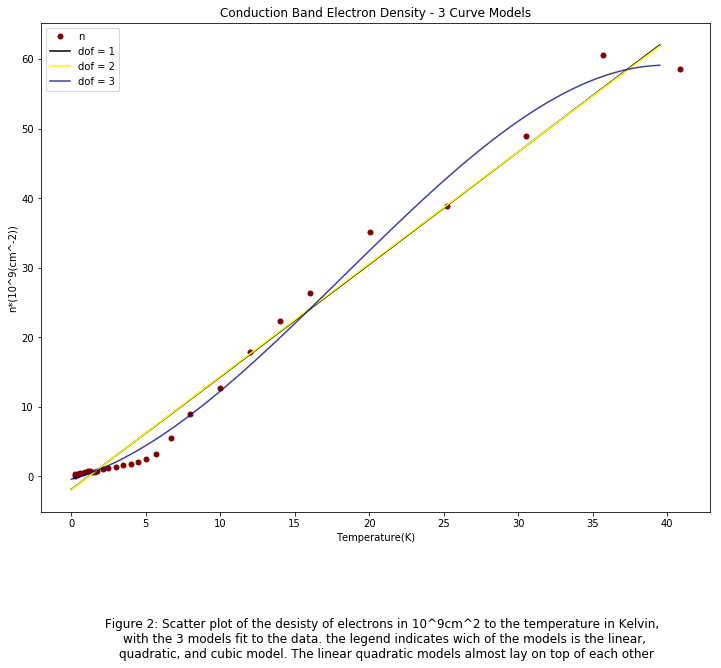

In [48]:
xrange = np.arange(0, 40, 0.5)

pl.figure(figsize=(12, 9))
pl.plot(nam18reduced[t] , nam18reduced[n], '.', ms=10, c = "maroon")
pl.plot(xrange, polynom(xrange, *lfopt), c = 'k')
pl.plot(xrange, polynom(xrange, *qfopt), c = 'yellow' )
pl.plot(xrange, polynom(xrange, *cfopt), alpha = 0.75, c = 'navy')
pl.legend(['n', 'dof = 1', 'dof = 2','dof = 3'])
pl.title('Conduction Band Electron Density - 3 Curve Models')
pl.xlabel('Temperature(K)')
pl.ylabel('n*(10^9(cm^-2))')

figure2Label = 'Figure 2: Scatter plot of the desisty of electrons in 10^9cm^2 to the temperature in Kelvin,  \nwith the 3 models fit to the data. the legend indicates wich of the models is the linear, \nquadratic, and cubic model. The linear quadratic models almost lay on top of each other'
pl.figtext(0.525, -0.10, figure2Label, ha = 'center', fontsize = 12, wrap = True)


# 5 *formally* compare the models with a test that returns a p-value assessment (NHRT) to determine which model is best. Sort the models from the best one to the worse one.

Our null hypothesis is that **the simplest model is the best model**, while testing aconfidence level of p=0.05. Performing a Likelihood-Ratio test we determine:


In [34]:
LRT_3_2 = model3.compare_lr_test(model2)
LRT_3_1 = model3.compare_lr_test(model1)
LRT_2_1 = model2.compare_lr_test(model1)

print('Compare DOF  \t Likelihood Ratio  \t p-value  \t Difference in DOF')
print('2 & 3:\t\t', LRT_3_2, '\n1 & 3:\t\t', LRT_3_1, '\n1 & 2:\t\t', LRT_2_1)

Compare DOF  	 Likelihood Ratio  	 p-value  	 Difference in DOF
2 & 3:		 (32.01784952536279, 1.5276246887173018e-08, 1.0) 
1 & 3:		 (32.040571530689235, 1.1027531159467018e-07, 2.0) 
1 & 2:		 (0.022722005326443195, 0.8801822372589625, 1.0)


In [35]:
print("the best model is the the Cubic model")

the best model is the the Cubic model


When comparing the cubic model to both the linear and quadratic models we find a p-value much less than p=0.05, meaning **there is evidence to reject the null hypothesis** that the simplest of the models are the best. When comparing the linear model to the quadratic model, we find a p-value much larger than p=0.5, meaning that **there is insufficient evidence to reject the null hypthesis** and therefore cannot say which of the linear or quadratic models is best.   

### Install emcee

In [28]:
!pip install emcee


     |████████████████████████████████| 61kB 4.2MB/s 
